In [174]:
import pandas as pd
import seaborn as sea
import numpy as np
import os

import matplotlib.pyplot as plt
import plotly
import plotly.plotly as py
import plotly.figure_factory as ff
from plotly.graph_objs import *

import tweepy
import itertools
import json
from datetime import datetime

In [175]:
plotly_key = os.environ["PLOTLY_KEY"]
mapbox_token = "pk.eyJ1IjoiYW14bW9uZ29vc2UiLCJhIjoiY2plbG1iYml3MXdrYjJxbW80YW53dWE0bCJ9.3VkhNFfkrJISw42FzdDbRA"
plotly.tools.set_credentials_file(username='amxmongoose', api_key=plotly_key)

Data Used:
    1. U.S. census data
    2. County health data
    3. Air quality data
    
Objectives:
    1. Identify relationship between geographic information and health statistics
    2. Determine is there is a correlation between geographic air quality and health quality
    3. Show healthiest/unhealthiest places in the united states both in air quality and health statistics
    

In [217]:
health_data_path = os.path.join('Data Sets', 'health_data', 'SUMMARYMEASURESOFHEALTH.csv')
fields = ['State_FIPS_Code', 'County_FIPS_Code','CHSI_County_Name','CHSI_State_Name','ALE','All_Death','Health_Status']
health_df = pd.read_csv(health_data_path, skipinitialspace=True, usecols=fields)
health_df = health_df.rename(columns={'CHSI_County_Name':'County','CHSI_State_Name':'State'})
health_df['State_FIPS_Code'] = health_df['State_FIPS_Code'].apply(lambda x: '{0:0>2}'.format(int(x)))
health_df['County_FIPS_Code'] = health_df['County_FIPS_Code'].apply(lambda x: '{0:0>3}'.format(int(x)))
health_df["FIPS"] = health_df["State_FIPS_Code"].map(str) + merged_df["County_FIPS_Code"]

In [238]:
census_data_path = os.path.join('Data Sets', 'acs2015_county_data.csv')
fields = ['State', 'County', 'TotalPop', 'Income', 'IncomePerCap', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'Unemployment']
census_df = pd.read_csv(census_data_path, skipinitialspace=True, usecols=fields)

In [242]:
merged_df = pd.merge(health_df,census_df,on=['County','State'],how='outer')

In [243]:
air_data_path = os.path.join('Data Sets', 'annual_aqi_by_county_2017.csv')
fields = ['State', 'County', 'Max AQI', 'Median AQI','Unhealthy Days']
air_df = pd.read_csv(air_data_path, skipinitialspace=True, usecols=fields)

In [244]:
merged_df = pd.merge(merged_df,air_df,on=['County','State'],how='outer')
merged_df = merged_df.dropna(subset = ['Max AQI','Median AQI','State_FIPS_Code','County_FIPS_Code'])

In [245]:
merged_df.head(1)

,State_FIPS_Code,County_FIPS_Code,County,State,ALE,All_Death,Health_Status,FIPS,TotalPop,Income,...,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,Unemployment,Unhealthy Days,Max AQI,Median AQI
1,01,003,Baldwin,Alabama,76.6,856.9,15.4,01003,195121.0,50254.0,...,0.1,1.0,1.4,3.9,26.4,85953.0,7.5,0.0,108.0,41.0


In [246]:
california_df = merged_df.loc[merged_df['State'] == 'California']
california_df = california_df.reset_index(drop=True)

<function matplotlib.pyplot.show>

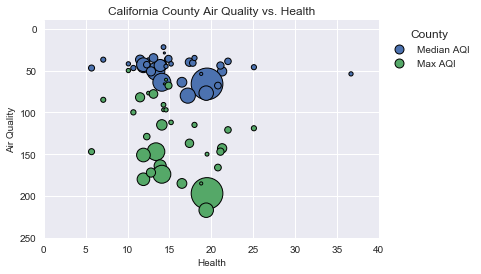

In [247]:
plt.scatter(x=california_df['Health_Status'], 
            y=california_df['Median AQI'],
            edgecolors = 'black',
            s=california_df['TotalPop']/10000,
            marker = 'o',
            linewidth = 1.0)

plt.scatter(x=california_df['Health_Status'], 
            y=california_df['Max AQI'],
            edgecolors = 'black',
            s=california_df['TotalPop']/10000,
            marker = 'o',
            linewidth = 1.0) 

plt.legend(['Median AQI','Max AQI'],
           title=('County'),
           bbox_to_anchor=(1.3,1), 
           fancybox=True, 
           fontsize=10, 
           markerscale=.4)

plt.title('California County Air Quality vs. Health')
plt.xlabel('Health',fontsize=10)
plt.ylabel('Air Quality',fontsize=10)
plt.xlim(0,40)
plt.ylim(250,-10)        
sea.set()

plt.show

<function matplotlib.pyplot.show>

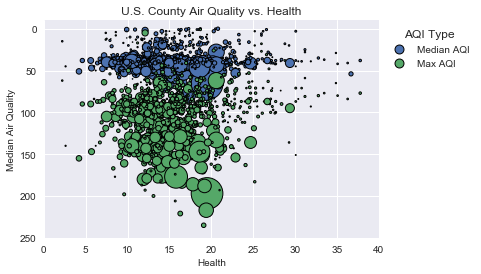

In [248]:
plt.scatter(x=merged_df['Health_Status'], 
            y=merged_df['Median AQI'],
            edgecolors = 'black',
            s=merged_df['TotalPop']/10000,
            marker = 'o',
            linewidth = 1.0)

plt.scatter(x=merged_df['Health_Status'], 
            y=merged_df['Max AQI'],
            edgecolors = 'black',
            s=merged_df['TotalPop']/10000,
            marker = 'o',
            linewidth = 1.0)

plt.legend(['Median AQI','Max AQI'],
           title=('AQI Type'), 
           bbox_to_anchor=(1.3,1), 
           fancybox=True, 
           fontsize=10, 
           markerscale=0.4)

plt.title('U.S. County Air Quality vs. Health')
plt.xlabel('Health',fontsize=10)
plt.ylabel('Median Air Quality',fontsize=10)
plt.xlim(0,40)
plt.ylim(250,-10)        
sea.set()

plt.show

In [249]:


data = Data([
    Scattermapbox(
        lat=['45.5017'],
        lon=['-73.5673'],
        mode='markers',
        marker=Marker(
            size=14
        ),
        text=['Montreal'],
    )
])

layout = Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_token,
        bearing=0,
        center=dict(
            lat=45,
            lon=-73
        ),
        pitch=0,
        zoom=1,
        style='light'
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig)

In [250]:
fips = merged_df['FIPS']

values_max = merged_df['Max AQI']
bins_max = [25,50,75,100,125,150,175,200,250,300,400,500,1000]

fig1 = ff.create_choropleth(fips=fips, values=values_max, binning_endpoints=bins_max)

py.iplot(fig1)

In [251]:
values_pop = merged_df['TotalPop']
bins_pop = [10000,50000,100000,250000,500000,750000,1000000,2500000,5000000,10000000]
fig2 = ff.create_choropleth(fips=fips, values=values_pop, binning_endpoints=bins_pop)
py.iplot(fig2)

In [ ]:
cal_avg_ale = california_df['ALE'].mean()
cal_avg_death = california_df['All_Death'].mean()
cal_avg_health = california_df['Health_Status'].mean()

In [9]:
geo_path = os.path.join('Data Sets', 'uscitiesv1.3.csv')
geo_data = pd.read_csv(geo_path)

# Extract the data we're interested in
lat = geo_data['lat'].values
lon = geo_data['lng'].values
population = geo_data['population'].values
#area = geo_data['area_total_km2'].values